In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from similarity_searching_sketches.multi_hash_index_stats import ListStatsCounter
from similarity_searching_sketches.multi_hash_index_stats import bucket_stats
from similarity_searching_sketches.multi_hash_index_stats import bucket_sizes
from similarity_searching_sketches.multi_hash_index_stats import stats_to_pandas
from similarity_searching_sketches.multi_hash_index_stats import rq_candidate_set_size_stats
from similarity_searching_sketches.multi_hash_index import MultiHashIndex
from similarity_searching_sketches.persistence import load_np_array
from similarity_searching_sketches.utils import df_to_latex
from similarity_searching_sketches.visualization import hist_array
from similarity_searching_sketches.visualization import plot_array
%matplotlib inline

In [2]:
DATA_FOLDER='/home/matej/data/sketch-testing/dataset_10K/'
PIVOTS_PATH=DATA_FOLDER+'selected_pivots.npy'
MHI_DB_SAVE_PATH=DATA_FOLDER+'mhi_sketch_db.npy'
BUCKET_STATS_LATEX_SAVE_FILE=DATA_FOLDER+'bucket_stats.tex'
CANDIDATE_SET_SIZE_STATS_LATEX_SAVE_FILE=DATA_FOLDER+'candidate_set_size_stats.tex'
SKETCH_LEN=32
N_QUERY_OBJS=100
MAX_M=16

#### Prepare Sketch DB

In [3]:
sketch_db=load_np_array(MHI_DB_SAVE_PATH).T[:SKETCH_LEN].T

In [4]:
ids=np.arange(sketch_db.shape[0])

In [5]:
db=[(ids[i],sketch_db[i]) for i in range(sketch_db.shape[0])]
random.shuffle(db)
queries=db[:N_QUERY_OBJS]
sketch_db=db[N_QUERY_OBJS:]
del db

In [6]:
len(sketch_db)

9900

#### Initialize MHI's

In [7]:
m_list=range(1,MAX_M+1,1)
mhis=[MultiHashIndex(sketch_db, m) for m in m_list]

#### Compute stats  for MHI's buckets

In [8]:
bucket_stats_keys, bucket_stats=bucket_stats(mhis, m_list)

In [9]:
bucket_stats_df=stats_to_pandas(bucket_stats_keys, bucket_stats)

/home/matej/project/similarity-searching-sketches/similarity_searching_sketches/multi_hash_index_stats.py:21: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  return pd.DataFrame.from_dict({key: stats[key] for key in keys}).reindex_axis(keys, axis=1)


In [10]:
bucket_stats_df

,m,r,Bucket count,Bucket size mean,Bucket size st. dev.,Bucket size sum,m x Bucket size mean
0,1,0,9782,1.012063,0.125707,9900,1.012063
1,2,1,10934,1.810865,2.280593,19800,3.621730
2,3,2,3460,8.583815,15.469723,29700,25.751445
3,4,3,984,40.243902,59.369309,39600,160.975610
4,5,4,444,111.486486,149.166490,49500,557.432432
5,6,5,256,232.031250,271.230527,59400,1392.187500
6,7,6,176,393.750000,416.266543,69300,2756.250000
7,8,7,128,618.750000,540.678205,79200,4950.000000
8,9,8,112,795.535714,715.893360,89100,7159.821429
9,10,9,96,1031.250000,856.682154,99000,10312.500000


In [11]:
df_to_latex(BUCKET_STATS_LATEX_SAVE_FILE,bucket_stats_df)

#### Visualize bucket sizes

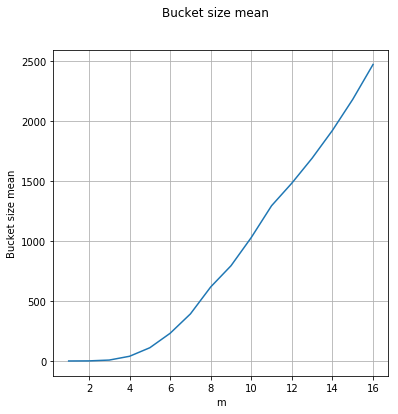

In [12]:
plot_array([None]+list(bucket_stats_df['Bucket size mean'].values), title='Bucket size mean', xlabel='m', ylabel='Bucket size mean', figsize=(6,6))

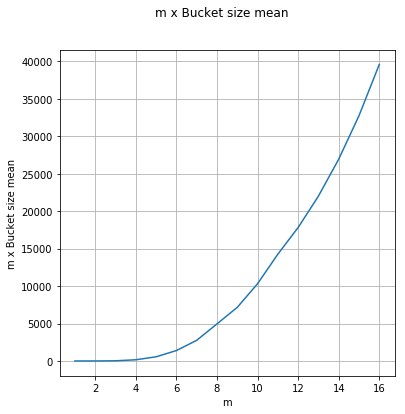

In [13]:
plot_array([None]+list(bucket_stats_df['m x Bucket size mean'].values), title='m x Bucket size mean', xlabel='m', ylabel='m x Bucket size mean', figsize=(6,6))

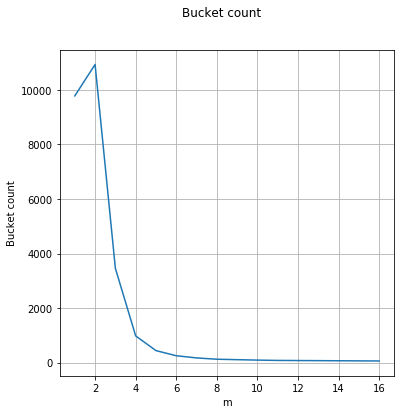

In [14]:
plot_array([None]+list(bucket_stats_df['Bucket count'].values), title='Bucket count', xlabel='m', ylabel='Bucket count', figsize=(6,6))

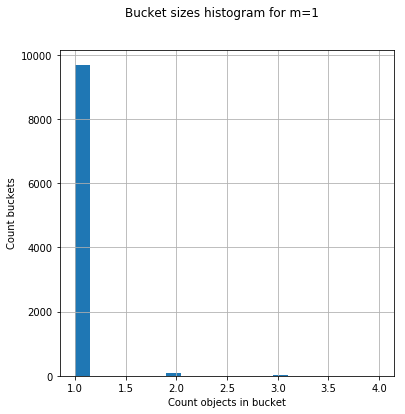

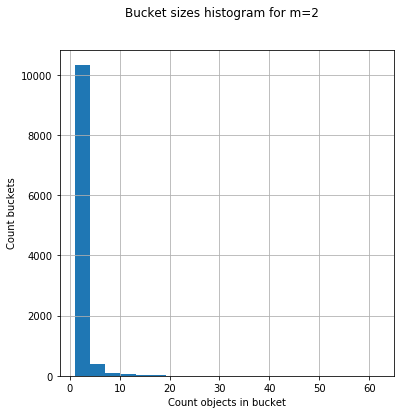

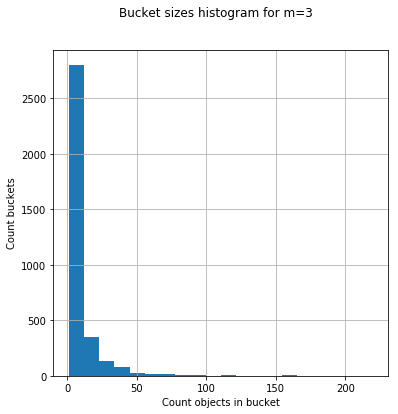

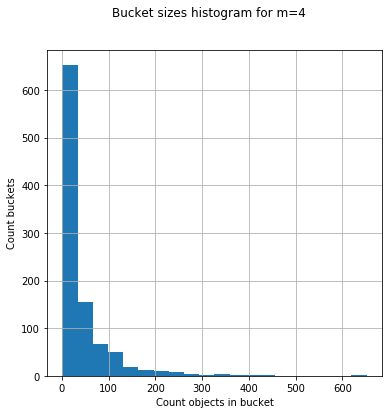

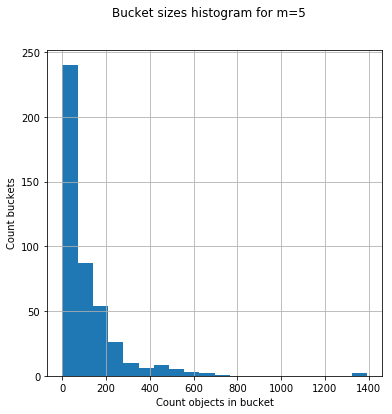

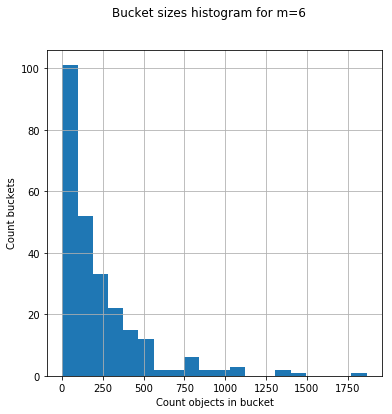

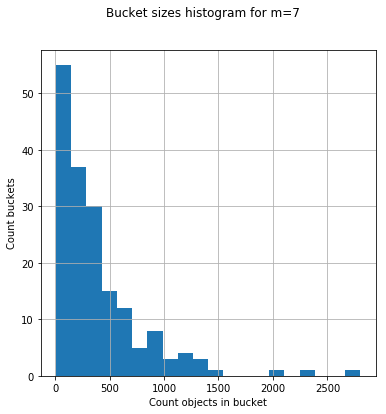

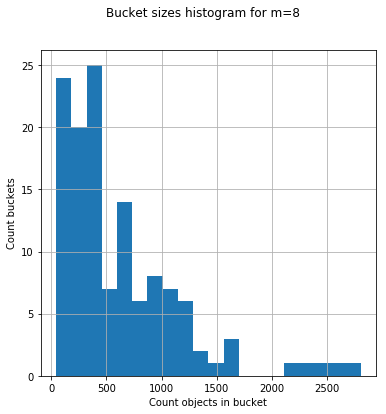

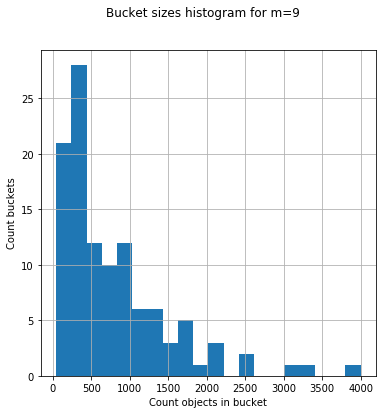

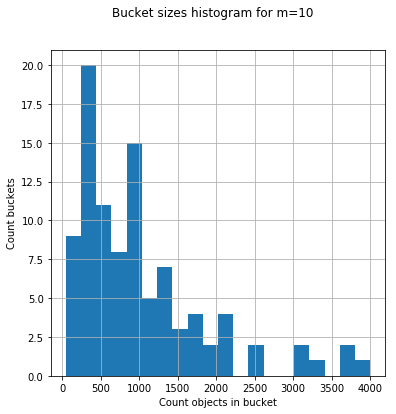

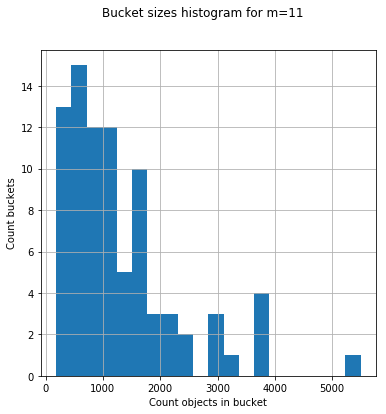

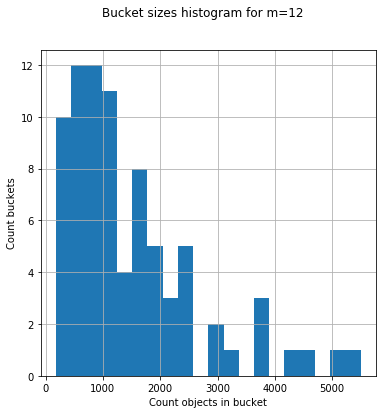

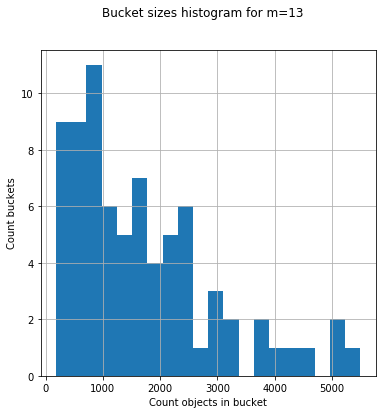

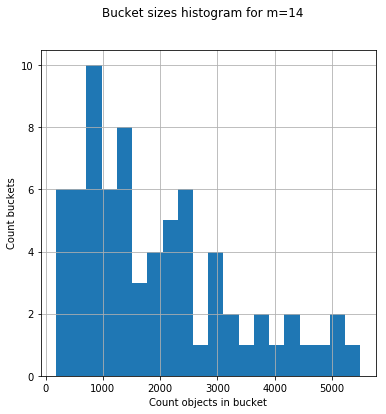

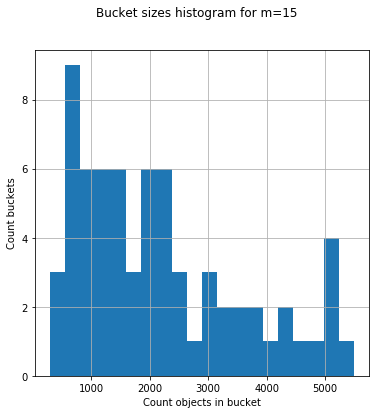

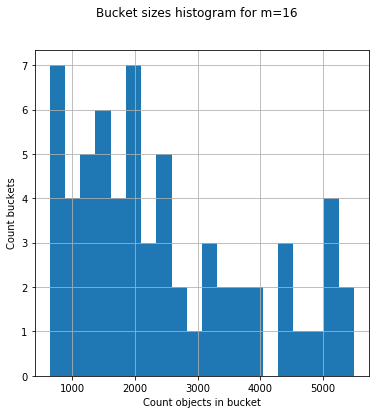

In [15]:
for i,mhi in enumerate(mhis):
    m=m_list[i]
    hist_array(bucket_sizes(mhi), bins=20, title='Bucket sizes histogram for m='+str(m), xlabel='Count objects in bucket', ylabel='Count buckets', figsize=(6,6))
    
    

#### Range query candidate set sizes

In [16]:
keys,stats=rq_candidate_set_size_stats(queries, mhis, m_list,len(sketch_db))
candidate_set_stats_df=stats_to_pandas(keys,stats)

/home/matej/project/similarity-searching-sketches/similarity_searching_sketches/multi_hash_index_stats.py:21: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  return pd.DataFrame.from_dict({key: stats[key] for key in keys}).reindex_axis(keys, axis=1)


In [17]:
candidate_set_stats_df

,m,r,Mean TP count,m x Bucket size mean,Mean |C_1|+...+|C_m|,Mean |C|,Mean % bucket overlap,Mean % db filtered
0,1,0,0.02,1.012063,0.02,0.02,0.000000,99.999798
1,2,1,0.14,3.621730,5.34,5.32,0.374532,99.946263
2,3,2,1.19,25.751445,91.95,90.91,1.131049,99.081717
3,4,3,5.22,160.975610,480.32,461.56,3.905730,95.337778
4,5,4,17.94,557.432432,1504.32,1357.40,9.766539,86.288889
5,6,5,50.54,1392.187500,3141.42,2625.54,16.421873,73.479394
6,7,6,122.08,2756.250000,5653.17,4298.95,23.955055,56.576263
7,8,7,260.69,4950.000000,8513.02,5666.34,33.439132,42.764242
8,9,8,506.47,7159.821429,12631.77,7190.87,43.073140,27.364949
9,10,9,909.70,10312.500000,16989.01,8199.10,51.738801,17.180808


In [18]:
df_to_latex(CANDIDATE_SET_SIZE_STATS_LATEX_SAVE_FILE, candidate_set_stats_df)

/home/matej/project/similarity-searching-sketches/similarity_searching_sketches/multi_hash_index_stats.py:21: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  return pd.DataFrame.from_dict({key: stats[key] for key in keys}).reindex_axis(keys, axis=1)


Text(0,0.5,"Count object ID's")

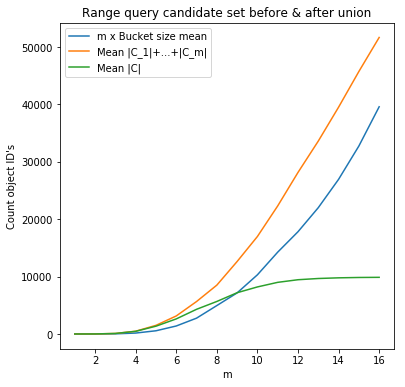

In [19]:
candidate_set_stats_df_with_m0=stats_to_pandas(keys, {key:[None]+stats[key] for key in stats.keys()})
candidate_set_stats_df_with_m0[['m x Bucket size mean','Mean |C_1|+...+|C_m|','Mean |C|']].plot(figsize=(6,6))
plt.title('Range query candidate set before & after union')
plt.xlabel('m')
plt.ylabel('Count object ID\'s')